In [1]:
import pandas 

results = pandas.read_csv('/home/djukanovic/Desktop/vjeze/radovi/MWPP/MTWNPP/tabele/test.csv', sep=";"  , na_values="'")
#print(results)
print(results.columns)
results1 = pandas.read_csv('/home/djukanovic/Desktop/vjeze/radovi/MWPP/MTWNPP/tabele/test1.csv', sep=";"  , na_values="'")

#results1

Index(['file', 'Faria', 'n', 'm', 'k', 'type', 'objFaria', 'ttot', 'LB'], dtype='object')


In [2]:
#print(results[results["k"] == 2][["file" ,"k"]])

grupisani = results.groupby(['m', 'n', 'k']).agg({"objFaria" : ["mean"], "LB" : ["mean"]})
grupisani.columns = ["obj-avg", "LB-avg"]
grupisani = grupisani.reset_index()
grupisani
#for m, n, k, ostatak in grupisani:
#    print(m,n,k, ostatak["objFaria"].mean())


,m,n,k,obj-avg,LB-avg
0,2,30,2,17.2064,17.20640
1,2,30,3,141.0932,97.94500
2,2,30,4,498.4400,384.28332
3,2,30,5,1180.8854,1180.88540
4,2,30,10,16426.0326,12747.26208
...,...,...,...,...,...
331,20,500,4,109982.8232,0.00000
332,20,500,5,122726.3202,0.00000
333,20,500,10,168538.9424,0.00000
334,20,500,20,298332.1192,0.00000


In [3]:
from scipy import stats

# compare objective values of results and results1 frame: 
faria_obj = results["objFaria"]
fariaLB = results["LB"]
new_obj = results1["objNew"]
newLB = results1["LB"]

# compare T-test is made:
# compare obj stats difference, if p_value > 0.05, the difference is significant
# stats.ttest_ind(faria_obj, new_obj)
stats.ttest_ind(fariaLB, newLB) # p_val = 0.24 (difference is significant)

#  Wilcoxon signed-rank test (Ttest pretp. Gausovu gresku, Wilcoxon-ov test relaksira ovu pretp.)

stats.wilcoxon(fariaLB, newLB) # p_value = 2.6x 10^{-9}

# man whitney U test (non-pair) test:
stats.mannwhitneyu(fariaLB, newLB) # p_val = 0.2


# linearni modeli...



MannwhitneyuResult(statistic=1391688.5, pvalue=0.19177013970087226)

In [4]:
# wok on Covid data anaysis
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as pt
from sklearn.metrics import r2_score


data_covid = pd.read_csv("covid_data.csv", sep=",")
data_covid_serbia = data_covid[data_covid["location"] == "Serbia"]
data_serbia_important = data_covid_serbia[["date", "new_cases"]][300:]
data_serbia_important = data_serbia_important.reset_index()
#print(data_serbia_important)

axis = data_serbia_important.plot()
axis.set_title("Cases in Serbia")
axis.set_xlabel("Days")
axis.set_ylabel("Daily cases")
axis.set_xticks([5, 15, 25, 35, 45])
axis.set_xticklabels(["Dec 20", "Jan 5", "Jan 20", "Feb 5", "Feb 10"])
axis.set_ylim([0, 10000])

# prediction in a next few weeks
# linear regression days ====> cases
days = [i for i in range(51) ]

slope, intercept, r, p, std_err = stats.linregress(days, data_serbia_important["new_cases"])
days_expand = [i + 0.0 for i in range(71) ]
predict = []
for d in days_expand:
    predict.append(d * slope + intercept)
print(slope, " ", intercept)
print(predict[51 + 10])
#pt.plot(days_expand, predict)

# polynomial regression: 
model = np.poly1d(np.polyfit(days, data_serbia_important["new_cases"], 3))
pt.plot(days_expand, model(days_expand))

print("predict on feb 20 (num. of cases): ", model(61))
print("preciznost modela: ", r2_score(data_serbia_important["new_cases"], model(days) ))

# multinomila regression (vise parametara uzeto x + scope1 * y + scope2 * z + intercept)
 
data_covid_important = data_covid[["location", "total_deaths", "gdp_per_capita", "new_cases", 
                                 "new_deaths", "handwashing_facilities","life_expectancy" ]].groupby(by=["location"]).agg({ "total_deaths": "mean",  "gdp_per_capita": "mean"
                                         ,"new_deaths": "sum", "handwashing_facilities" :"mean"
                                         ,"life_expectancy" : "mean" , "new_cases": "sum"
   
                                     })
 
data_covid_summary = data_covid_important.reset_index().fillna(0)
print(data_covid_summary)
# analysing:
# corelation GDP ==> number of infected...

coef = stats.pearsonr(data_covid_summary["total_deaths"], data_covid_summary["new_cases"])
print("r.coef ==> ", coef) # r koef = -0.02 ==> ne zan se jesu li u relaciji ili ne...
# "total_deaths and  new_cases, r = 0.99 == > potpuna korelacija

coef_rel = stats.pearsonr(data_covid_summary["handwashing_facilities"], data_covid_summary["gdp_per_capita"])
print("Relacija izmedju handwashing_facilities i gdp_per_capita: ", coef_rel)

## 
coef_rell = stats.pearsonr(data_covid_summary["life_expectancy"], data_covid_summary["gdp_per_capita"])
print("Relacija izmedju life_expectancy i gdp_per_capita: ", coef_rell)

# multiple regression:

X = data_covid_summary[["total_deaths", "handwashing_facilities"]]
Y = data_covid_summary["new_cases"]

from sklearn import linear_model

model = linear_model.LinearRegression()
# regression model set up
model.fit(X, Y)

print("predict: ", model.predict([[20, 30]]))

print("error: ",  model.coef_)


AttributeError: module 'importlib._bootstrap' has no attribute 'SourceFileLoader'

In [ ]:
# test and train:
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats
from sklearn.metrics import r2_score

np.random.seed(2)

X = np.random.normal(5, 1, 100) # 100 numbers form normal distribution
Y = np.random.normal(50, 5, 100) / X

print("X ", X)
print("Y ", Y)

#podjela trening set, test set ==> omjer je najcesce 80:20

tr_X = X[:80]
tr_Y = Y[:80]

test_X = X[80:] # test to get a model ==> fit 
test_Y = Y[80:]

plt.plot(test_X, test_Y, 'o', label="test")

# model on test data:

scope, intercept, *_ = stats.linregress(test_X, test_Y)
draw_line = np.linspace(2, 7, 100)
plt.plot(draw_line, scope * draw_line + intercept)
plt.plot(tr_X, tr_Y, 'o', label="train")

# polynomna regesija:

model = np.poly1d(np.polyfit(test_X, test_Y, 2))
plt.plot(draw_line, model(draw_line))
# new prediction
print("error of the poly model (on test model): ", r2_score( test_Y, model( test_X) ))
print("error of the poly model (on train model): ", r2_score( tr_Y, model(tr_X) ))

plt.legend()
plt.show()

In [ ]:
# scipy library
from scipy import optimize
from math import cos

def f(x):
    return x*x + 1

korijeni = optimize.root(f, 0)
print(korijeni.x)

# minimize(funxtion, initial_guess, method="")

x = optimize.minimize(f, 0, method="CG")
print(x.x)

## scipy graphs:



In [ ]:
# io file

from scipy import stats
from scipy import io
import numpy as np 

np.random.seed(2)

vec = np.random.normal(5, 10, 100)
print(vec)

io.savemat('vec.mat', {"vec": vec})

data = io.loadmat('vec.mat')
print(data['vec'])

# SciPy Statistical Significance Tests
v1 = np.random.normal(5, 1, size=100)
v2 = np.random.normal(5, 2, size=100)

# T-test: provjera da li postoji bitna razlika izmedju dva skupa podataka (dvije varijable)
# and lets us know if they belong to the same distribution; mala p-vrijednost ==> nema razlike
# podaci iste duzine
res = stats.ttest_ind(v1, v2)
print(res) 
#  returns p value for the null hypothesis
test = stats.normaltest(v1)
print(test)
# da li je v1 iz normalne distr. 
res = stats.kstest(v1, 'norm')
print(res)

test = stats.wilcoxon(v1,v2)
print(test)



In [ ]:
#preprocessing:

from sklearn import preprocessing
import pandas as pd
from numpy import set_printoptions

data_covid = pd.read_csv("covid_data.csv", sep=",")
data_covid_serbia = data_covid[data_covid["location"] == "Serbia"].fillna(0)

data_cov_array1 =  data_covid_serbia[data_covid_serbia.columns[4:]] 
data_cov_array1.replace(r'\s+', 0, regex=True)
data_cov_array = (data_cov_array1[data_cov_array1["total_cases"] > 0]).values

# Skaliranje i norlanizacija (l_1 i l_2 norma) sluze za pripremanje podataka za ML model
# definisanje skalera:
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# skaliranje podataka
# data_rescaled = scaler.fit_transform(data_cov_array)
# set_printoptions(precision = 1)
# print(data_rescaled)
# data_scaler = StandardScaler().fit(array)
# data_rescaled = data_scaler.transform(array)

# Importance of Data Feature Selection
# performanca modela ==> dorektno vezana sa feature (columns) koji su koristeni u treniranju modela
# relevant data features (fearure selection)
# Teorija: klasa koja se moze koristiti: 
# from sklearn.feature_selection funkcija SelectKBest 
#  ==> chi_square test mozemo koristi u odabiru ==> sako K kolona se odabire...

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

 
# test = SelectKBest(score_func=chi2, k=4)

# RFE with logistic regression algorithm to select the best 3 attributes 

# RFE fro sklearn.feature_selection
from sklearn.feature_selection import RFECV # RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#print(data_cov_array1.columns)
data_cov_array1 =data_cov_array1[['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 
                                  'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million']] 
data_cov_array = data_cov_array1.values

X = data_cov_array[:,0:4]   
print(X)
target = data_cov_array[:, 3] # target feature
#print(target)
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, target) 
print('Optimal number of features: {}'.format(rfecv.n_features_))
#print(rfecv.estimator_.feature_importances_)

# PCA ==> example of feature selection 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
features =  ['sepal length','sepal width','petal length','petal width','target']
data = pd.read_csv("iris.csv", sep=",", 
                   names =features
                  )
#print(data) 
from sklearn.preprocessing import StandardScaler

skaler = StandardScaler()


X = data[features[0:4]].values
Y = data[ features[4] ].values
# scale X

x = skaler.fit_transform(X)
#print(x)

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(x)
print(pca.components_)
print(pca.explained_variance_ratio_)
print(pca.n_features_)
 

data_restricted2D = pd.DataFrame(data = principal_components, columns = ["comp1", "comp2"] )
data_restricted2Dfinal = pd.concat([data_restricted2D, data[["target"]]], axis = 1)

# visualise data:
label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color = ["r", "g", "b"]

fig, ax = plt.subplots()

for lab, col in zip(label, color):
    indices  = data_restricted2Dfinal["target"] == lab
    ax.scatter(data_restricted2Dfinal.loc[indices, "comp1"], 
               data_restricted2Dfinal.loc[indices, "comp2" ],
               color = col)

ax.legend(label)
plt.show()
# ==> now, proncipal_components may be use in prediction...




In [ ]:
'''
Data Preparation
data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

gender_mapper = {'male': 0, 'female': 1}
data['Sex'].replace(gender_mapper, inplace=True)

data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']]
data = data.rename(columns={'Title': 'Title_Unusual'})
data.drop('Name', axis=1, inplace=True)

data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']]
data.drop('Cabin', axis=1, inplace=True)

emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked')
data = pd.concat([data, emb_dummies], axis=1)
data.drop('Embarked', axis=1, inplace=True)

data['Age'] = data['Age'].fillna(int(data['Age'].mean()))
'''

                                             instance  obj1  obj2
0   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   168   217
1   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   345   235
2   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...     0     0
3   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   730  1336
4   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   432   585
5   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   358   490
6   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...  1247  1413
7   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   321   382
8   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   459   666
9   runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   441   597
10  runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   489   761
11  runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   489   736
12  runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   297   376
13  runs/gclcs-real-algorithm-1bw-0-guidance-0k_be...   743  1234
14  runs/g

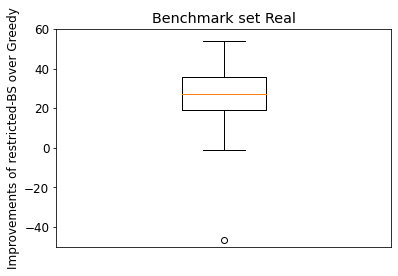

In [106]:
# Greedy over restricted-BS (comparison)

import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

def prepareDiff (sigma): 
   
    part = "runs/gclcs-alg-3bs-10000guidance-1-feas-1-new/gclcs_"
    part_greedy = "runs/gclcs-alg-1bs-1guidance-1feas-1-allowed/gclcs_"
    
    greedy_res = pd.read_csv("gclcs-alg-1bs-1guidance-1feas-1-allowed.csv", sep=";", header = 0,  names=["file", "obj", "time", "s"])
    restricted_BS_res = pd.read_csv("gclcs-alg-3bs-10000guidance-1-feas-1-new.csv", sep=",", names=["file", "obj", "time", "s"])
    # join tables
    Sumary = pd.concat([greedy_res[[ "file", "obj"]], restricted_BS_res["obj"]], axis = 1)
    Sumary.columns = ["instance", "obj1", "obj2"]
    print(Sumary)
    #greedy_res["sigma"] = greedy_res.apply(lambda x:  int(x["file"][51:].split("_")[2].rstrip()), axis = 1 )
    restricted_BS_res["sigma"] = restricted_BS_res.apply(lambda x:  int(x["file"][len(part) + 1 : ].split("_")[2].rstrip()), axis = 1 )

    # percentage calculation gclcs-alg-3bs-10000guidance-1feas-1-rad
    Sumary["sigma"] = Sumary.apply(lambda x:  int( (x["instance"][ len(part_greedy) : ].split("_")[2]).rstrip()), axis = 1 )
    Sumary["instance"] = Sumary.apply(lambda x:  int(x["instance"][51:].split("_")[0]), axis = 1 )
    Sumary["diffGreedy_restrictedBS"] = Sumary.apply(lambda x: -10000.0 if float( str(x["obj2"]).rstrip() ) <= 0 or float(str(x["obj1"]).rstrip()) <= 0  else  100.0 * ((float(str(x["obj2"]).rstrip()))  - float(str(x["obj1"]).rstrip())) /  float(str(x["obj2"]).rstrip()), axis = 1 )
    Sumary = Sumary[Sumary["diffGreedy_restrictedBS"] > -1000.0 ] 
    #print("summary==> ", Sumary.shape[ 0 ])
    
    #greedy_res[ "sigma" ] = greedy_res.apply( lambda x :  x["file"][51:].split("_")[ 2 ], axis = 1 )
    
    # how many with the solution
    #gx = greedy_res[ greedy_res["sigma"] == sigma ]
    #gx = gx[gx["obj"] > 0 ]

    #print("    print(restricted_BS_res)\n ", restricted_BS_res )
    restricted_BS_res =restricted_BS_res[restricted_BS_res["sigma"] == sigma ]
    restricted_BS_res = restricted_BS_res[ restricted_BS_res["obj"] > 0 ]

    #print(gx)
    #print("Greedy        sigma > 20 with feas sol: ", gx.shape[ 0 ] )
    #print("restricted-BS sigma > 20 with feas sol: ", restricted_BS_res.shape[ 0 ] )
    # Summary ==> 
    Sumary_m_2  = Sumary[Sumary["instance"] == 2 ]  
    Sumary_m_5  = Sumary[Sumary["instance"] == 5]    
    Sumary_m_10 = Sumary[Sumary["instance"] == 10]  
    # High-Quality solutions:
    #print(Sumary_m_10)
    # draw boxplot:
    #print("Broj: ",  Sumary_m_2[Sumary_m_2["sigma"] == sigma ][Sumary_m_2["diffGreedy_restrictedBS"] < 0 ].shape[ 0 ] +  Sumary_m_5[ Sumary_m_5[ "sigma" ] == sigma ][ Sumary_m_5["diffGreedy_restrictedBS"] < 0 ] .shape[ 0 ] +  Sumary_m_10[ Sumary_m_10[ "sigma" ] == sigma ][Sumary_m_10["diffGreedy_restrictedBS"] < 0  ].shape[ 0 ] )
    fig, ax = pt.subplots()
    pt.boxplot([
                 Sumary_m_2[Sumary_m_2["sigma"] == sigma ]["diffGreedy_restrictedBS"], 
                 Sumary_m_5[Sumary_m_5["sigma"] == sigma ]["diffGreedy_restrictedBS"], 
                 Sumary_m_10[Sumary_m_10["sigma"] == sigma ]["diffGreedy_restrictedBS"] 
               ], widths = [1, 1, 1], positions = [2, 4, 6])
    pt.xlim([0, 8])
    pt.xticks([2,4,6], [2, 5, 10])
    pt.xlabel("$m$")
    pt.ylabel("Improvements of restricted-BS over Greedy")
    pt.title("Instances with $|\Sigma|$=" + str(sigma))
    pt.ylim([-10, 25 ])
    save_name = "improvements_restrBS_greedy_m_" + str(sigma) +".eps"
    #pt.show()
    pt.savefig(save_name)
 
def prepareDiffReal():
    
    greedy_res = pd.read_csv("gclcs-real-algorithm-1bw-0-guidance-0k_best-0feas-1.csv", sep=";", header = 0, names=["file", "obj", "time", "s"])
    restricted_BS_res = pd.read_csv("gclcs-real-algorithm-3bw-5000-guidance-1k_best-0feas-1.csv", sep=",",   names=["file", "obj", "time", "s"])
    Sumary = pd.concat([greedy_res[[ "file", "obj"]],restricted_BS_res["obj"]], axis = 1)
    Sumary.columns = ["instance", "obj1", "obj2"]    
    print(Sumary)
    Sumary["diffGreedy_restrictedBS"] = Sumary.apply(lambda x: -1.0 if float(str(x["obj2"]).rstrip()) <= 0 or float(str(x["obj1"]).rstrip()) <= 0  else  100.0 * ((float(str(x["obj2"]).rstrip()))  - float(str(x["obj1"]).rstrip())) /  float(str(x["obj2"]).rstrip()), axis = 1 )
    
    fig, ax = pt.subplots()
    pt.boxplot([
                 Sumary["diffGreedy_restrictedBS"]
                 
               ], widths = [1], positions = [2])
    pt.xlim([0, 4])
    pt.xticks([], [])
    #pt.xlabel("All instances")
    pt.ylabel("Improvements of restricted-BS over Greedy")
    pt.title("Benchmark set Real")
    pt.ylim([ -50, 60 ])
    save_name = "real_improvements_restrBS_greedy_m.eps"
    #pt.show()
    pt.savefig(save_name)

# =======================   real-world instance set   ================================================
columnsFeasibleRealWorld = ["instance", "obj1","time1",   "obj2", "time2", "objmax", "obj3", "time3"  ]
FeasibleRealWorld = pd.read_csv("real-feas.csv", sep=",", names=columnsFeasibleRealWorld)
 
columnsSolutionsRealWorld  =  ["instance", "obj1","time1",   "obj2", "time2",  "obj3", "time3"  ]
SolutionRealWorld = pd.read_csv("real-high-quality.csv", sep=",", names=columnsSolutionsRealWorld)

"""
print(FeasibleRealWorld[FeasibleRealWorld["obj1"] > 0].shape[0] )
data = [                FeasibleRealWorld[FeasibleRealWorld["obj1"] > 0].shape[0] ,  
                          FeasibleRealWorld[FeasibleRealWorld["obj2"] > 0].shape[0] ,
                          FeasibleRealWorld[FeasibleRealWorld["obj3"] > 0].shape[0] ,
                          SolutionRealWorld[SolutionRealWorld["obj1"] > 0].shape[0] ,
                          SolutionRealWorld[SolutionRealWorld["obj2"] > 0].shape[0] ,
                          4
       ]
"""
#pt.bar(["Greedy", "restricted-BS", "VNS", "BS-basic", "BS & VNS", "A*"],  data )
#pt.title("Real benchmark set")
#pt.ylabel("Number of instances")
#pt.savefig("real_feasible.eps")
#pt.show()
#prepareDiff(20)
prepareDiffReal()
#prepareDiff( 2 )

/home/djukanovic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


    index   m     n   p   k    obj1    obj2  diffGreedy_restrictedBS
35     36  10   100  20   2     9.8     9.8                 0.000000
36     37  10   100  50   2     7.4    5.71                22.837838
37     38  10   100  20   5    22.6    22.3                 1.327434
38     39  10   100  50   5    9.56    9.55                 0.104603
39     40  10   100  20  10     50     39.8                20.400000
40     41  10   100  50  10      18    16.7                 7.222222
41     42  10   500  20   2    49.5   49.25                 0.505051
42     43  10   500  50   2    43.5    39.8                 8.505747
43     44  10   500  20   5   124.6   112.3                 9.871589
44     45  10   500  50   5      52    47.2                 9.230769
45     46  10   500  20  10    250   206.87                17.252000
46     47  10   500  50  10   99.86   83.29                16.593231
47     48  10  1000  20   2      99    97.7                 1.313131
48     49  10  1000  50   2    93.

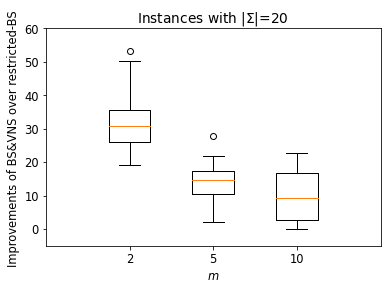

In [67]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np


# diff between restricted-BS and BS & VNS: 
columnsFeasible = ["m", "n", "p", "k", "obj1","time1", "feas1", "obj2", "time2", "feas2", "objmax", "obj3", "time3", "feas3"  ]
FeasibleSigma2 = pd.read_csv("feas-sigma-2.csv", sep=",", names= ["m", "n", "p",   "obj1","time1", "feas1", "obj2", "time2", "feas2", "objmax", "obj3", "time3", "feas3"  ])
FeasibleSigma4 = pd.read_csv("feas-sigma-4.csv", sep=",", names=columnsFeasible)
FeasibleSigma20 = pd.read_csv("feas-sigma-20.csv", sep=",", names=columnsFeasible)

columnsSolutions = ["m", "n", "p", "k", "obj1","time1", "feas1", "obj2",  "time2", "feas2", "obj3", "time3", "feas3"  ]
QualitySigma2 = pd.read_csv("sol-qual-sigma-2.csv", sep=",", names=columnsSolutions)
QualitySigma4 = pd.read_csv("sol-qual-sigma-4.csv", sep=",", names=columnsSolutions)
QualitySigma20= pd.read_csv("sol-qual-sigma-20.csv", sep=",", names=columnsSolutions)

# =======================   real-world instance set   ================================================
columnsFeasibleRealWorld = ["instance", "obj1","time1",   "obj2", "time2", "objmax", "obj3", "time3"  ]
FeasibleRealWorld = pd.read_csv("real-feas.csv", sep=",", names=columnsFeasibleRealWorld)
 
columnsSolutionsRealWorld  =  ["instance", "obj1","time1",   "obj2", "time2",  "obj3", "time3"  ]
SolutionRealWorld = pd.read_csv("real-high-quality.csv", sep=",", names=columnsSolutionsRealWorld)

def restrictes_BS_hybrid_diff(sigma=""):
    # DATA 
    Feas = pd.DataFrame()
    Data = pd.DataFrame()
    
    if sigma == "":
        Feas = FeasibleRealWorld
        Data = SolutionRealWorld
        print(SolutionRealWorld)
        print(FeasibleRealWorld)
    else:
        if sigma == 2:
            Feas = FeasibleSigma2
            Data = QualitySigma2
        elif sigma == 4:
            Feas = FeasibleSigma4
            Data = QualitySigma4
        else:
            Feas = FeasibleSigma20
            Data = QualitySigma20        
    Results = pd.DataFrame()
    if sigma != "":
        Results = pd.concat([Data[["m", "n", "p", "k", "obj2"]],Feas[ ["obj2"] ] ], axis = 1)
        Results.columns = ["m", "n", "p", "k", "obj1", "obj2"]
    else:
        Results = pd.concat([Data[["instance", "obj2"]],Feas[ ["obj2"] ] ], axis = 1)
        Results.columns = ["instance", "obj1", "obj2"]        
    
    index1 =   Results["obj1"] != ' - '
    index2 =   Results["obj2"] != ' - '
    Results = Results[index1]
    Results = Results[index2]
    Results = Results.reset_index()
    
    #print(Results)
    Results["diffGreedy_restrictedBS"] = Results.apply(lambda x: 100.0 * (float(x["obj1"])  - float(x["obj2"])) /  float(x["obj1"]), axis = 1 )
    Sumary_m_2 = Sumary_m_5 = Sumary_m_10 = None
    font = {'family' : 'normal',
        'size'   : 11.5
    }
    pt.rc('font', **font)
        
    if sigma != "":
        Sumary_m_2  = Results[Results["m"] == 2 ]   
        Sumary_m_5  = Results[Results["m"] == 5]    
        Sumary_m_10 = Results[Results["m"] == 10]  
    # High-Quality solutions:
    print(Sumary_m_10)
    # draw boxplot:
    fig, ax = pt.subplots()
    if sigma != "":
        pt.boxplot([
                 Sumary_m_2["diffGreedy_restrictedBS"], 
                 Sumary_m_5["diffGreedy_restrictedBS"], 
                 Sumary_m_10["diffGreedy_restrictedBS"] 
               ], widths = [1, 1, 1], positions = [2, 4, 6]
        )
    else:
        pt.boxplot([
                 Results["diffGreedy_restrictedBS"]
               ], widths = [1], positions = [2]
        )
        
    
    if sigma != "":
        pt.xticks([2,4,6], [2, 5, 10])
        pt.xlabel("$m$")
        pt.xlim([0, 8])
    else:
        pt.xticks([2], [""])
        pt.xlim([0, 4])
    pt.ylabel("Improvements of BS&VNS over restricted-BS ")
    if sigma != "":
        pt.title("Instances with $|\Sigma|$=" + str(sigma))
    else:
        pt.title("Benchmark set Real")

    pt.ylim([ -5, 60 ])
    save_name =""
    if sigma != "":
        save_name = "improvements_restrBS_hybrid_m_" + str(sigma) +".eps"
    else:
        save_name = "improvements_restrBS_hybrid_real.eps"
    #pt.show()
    pt.savefig(save_name)

# real instances

restrictes_BS_hybrid_diff( 20 )


sigma=2, feas
feasible sigma after ====> 
feasible sigma after ====> 
feasible sigma after ====> 
feasible sigma after ====> 
feasible sigma after ====> 
feasible sigma after ====> 


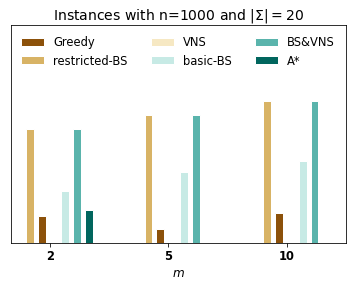

In [49]:
## FEASIBILITY CHECK

import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

#  ======================= RANDOM instances (for GCLCS paper) ==================================

print("sigma=2, feas")
columnsFeasible = ["m", "n", "p", "k", "obj1","time1", "feas1", "obj2", "time2", "feas2", "objmax", "obj3", "time3", "feas3"  ]
FeasibleSigma2 = pd.read_csv("feas-sigma-2.csv", sep=",", names= ["m", "n", "p",   "obj1","time1", "feas1", "obj2", "time2", "feas2", "objmax", "obj3", "time3", "feas3"  ])
FeasibleSigma4 = pd.read_csv("feas-sigma-4.csv", sep=",", names=columnsFeasible)
FeasibleSigma20 = pd.read_csv("feas-sigma-20.csv", sep=",", names=columnsFeasible)

# high-quality solutions
columnsSolutions = ["m", "n", "p", "k", "obj1","time1", "feas1", "obj2",  "time2", "feas2", "obj3", "time3", "feas3"  ]
QualitySigma2 = pd.read_csv("sol-qual-sigma-2.csv", sep=",", names=columnsSolutions)
QualitySigma4 = pd.read_csv("sol-qual-sigma-4.csv", sep=",", names=columnsSolutions)
QualitySigma20= pd.read_csv("sol-qual-sigma-20.csv", sep=",", names=columnsSolutions)

# =======================   real-world instance set   ===================================================

columnsFeasibleRealWorld = ["instance", "obj1","time1",   "obj2", "time2", "objmax", "obj3", "time3"  ]
FeasibleRealWorld = pd.read_csv("real-feas.csv", sep=",", names=columnsFeasibleRealWorld)
 
columnsSolutionsRealWorld  =  ["instance", "obj1","time1",   "obj2", "time2",  "obj3", "time3"  ]
SolutionRealWorld = pd.read_csv("real-high-quality.csv", sep=",", names=columnsSolutionsRealWorld)
 
# preparation of data

def prepareData(FeasibleSigma, sigma): 
    # look at those solutions where both algorithms find a solution:
    #index1 =   FeasibleSigma["obj1"] != ' - '
    #index2 =   FeasibleSigma["obj2"] != ' - '
    #FeasibleSigma = FeasibleSigma[index1]
    #FeasibleSigma = FeasibleSigma[index2]
    #FeasibleSigma = FeasibleSigma.reset_index()
    print("feasible sigma after ====> ")
    #print(FeasibleSigma)
    # percentage calculation
    #print(FeasibleSigma)
    #FeasibleSigma["diffGreedy_restrictedBS"] = FeasibleSigma.apply(lambda x: 100.0 * (float(x["obj2"])  - float(x["obj1"])) /  float(x["obj2"]), axis = 1 )
    FeasibleSigma["feas1"] = FeasibleSigma.apply(lambda x: x["feas1"] if len( str( x["feas1"] ).rstrip() ) <= 9 else str(x["feas1"]).rstrip()[9: len( str(x["feas1"] ).rstrip())-2 ], axis = 1 )
    FeasibleSigma["feas2"] = FeasibleSigma.apply(lambda x: x["feas2"] if len( str( x["feas2"] ).rstrip() ) <= 9 else str(x["feas2"]).rstrip()[9: len( str(x["feas2"] ).rstrip())-2 ], axis = 1 )
    FeasibleSigma["feas3"] = FeasibleSigma.apply(lambda x: x["feas3"] if len( str( x["feas3"] ).rstrip() ) <= 9 else str(x["feas3"]).rstrip()[9: len( str(x["feas3"] ).rstrip())-2 ], axis = 1 )
     # quality sigma:
    
    return FeasibleSigma

def FeasComparison(n, sigma):
        # random data
        FeasibleSigmaPrepared2  = prepareData(FeasibleSigma2, 2)
        FeasibleSigmaPrepared4  = prepareData(FeasibleSigma4, 4) 
        FeasibleSigmaPrepared10 = prepareData(FeasibleSigma20, 20)
        # Solutions Quality:
        QualitySigma2_m_2  = prepareData( QualitySigma2, 2) 
        QualitySigma2_m_4  = prepareData( QualitySigma4, 4) 
        QualitySigma2_m_20 = prepareData( QualitySigma20, 20) 


        dataFeasible = {}
        #print(FeasibleSigmaPrepared2)
        #FeasibleSigma2m_2_agg = FeasibleSigmaPrepared2["feas1"].sum()
        dataFeasible["2"] =  []
        dataFeasible["5"] =  []
        dataFeasible["10"] = []
        #aggregating group by different m:
        # print(FeasibleSigmaPrepared4)
        Feasible2  = FeasibleSigmaPrepared2[FeasibleSigmaPrepared2["n"] == n  ].groupby( by="m").agg({"feas1": "sum", "feas2" : "sum", "feas3": "sum"})
        Feasible4  = FeasibleSigmaPrepared4[FeasibleSigmaPrepared4["n"] == n  ].groupby( by="m").agg({"feas1": "sum", "feas2" : "sum", "feas3": "sum"})
        Feasible10 = FeasibleSigmaPrepared10[FeasibleSigmaPrepared10["n"] == n].groupby(by="m").agg({"feas1": "sum", "feas2" : "sum", "feas3": "sum"})

        Quality2  = QualitySigma2_m_2[QualitySigma2_m_2["n"] == n ].groupby( by="m").agg({"feas1": "sum", "feas2" : "sum", "feas3": "sum"})
        Quality4  = QualitySigma2_m_4[QualitySigma2_m_4["n"] == n ].groupby( by="m").agg({"feas1": "sum", "feas2" : "sum", "feas3": "sum"})
        Quality10 = QualitySigma2_m_20[QualitySigma2_m_20["n"] == n].groupby(by="m").agg({"feas1": "sum", "feas2" : "sum", "feas3": "sum"})        
        
        Feasible =  pd. DataFrame() 
        Quality  = pd.DataFrame()
        if  sigma == 2:
            Feasible = Feasible2
            Quality = Quality2
        elif sigma == 4:
            Feasible = Feasible4
            Quality = Quality4
        else:
            Feasible = Feasible10
            Quality = Quality10

            
        #print("Feasible ====>")
        #print(Feasible)
        index = 0
        for x in Feasible["feas1"]:
            if index == 0:
                dataFeasible["2"].append(x)
            elif index == 1:
                dataFeasible["5"].append(x)
            else:
                dataFeasible["10"].append(x)

            index = index + 1
        index = 0
        for x in Feasible["feas2"]:
            if index == 0:
                dataFeasible["2"].append(x)
            elif index == 1:
                dataFeasible["5"].append(x)
            else:
                dataFeasible["10"].append(x)

            index = index + 1
        index = 0
        for x in Feasible["feas3"]:
            if index == 0:
                dataFeasible["2"].append(x)
            elif index == 1:
                dataFeasible["5"].append(x)
            else:
                dataFeasible["10"].append(x)

            index = index + 1  
         # High Quality:
        index = 0
        for x in Quality["feas1"]:
            if index == 0:
                dataFeasible["2"].append(x)
            elif index == 1:
                dataFeasible["5"].append(x)
            else:
                dataFeasible["10"].append(x)

            index = index + 1
        index = 0
        for x in Quality["feas2"]:
            if index == 0:
                dataFeasible["2"].append(x)
            elif index == 1:
                dataFeasible["5"].append(x)
            else:
                dataFeasible["10"].append(x)

            index = index + 1
        index = 0
        for x in Quality["feas3"]:
            if index == 0:
                dataFeasible["2"].append(x)
            elif index == 1:
                dataFeasible["5"].append(x)
            else:
                dataFeasible["10"].append(x)

            index = index + 1 
        #print(dataFeasible)
        # draw a bar plot          #'weight' : 'bold',
        font = {'family' : 'normal',
        'size'   : 11.5}

        pt.rc('font', **font)
        
        x = [0.2, 3.2, 6.2] #, 1.1, 1.3, 1.5]
        x_minus_2 = [0.5, 3.5, 6.5] #, -0.9, -0.7, -0.5]
        x_plus_2 = [0.8, 3.8, 6.8 ] # , 3.1, 3.3, 3.5]
        
        ar1 = [ dataFeasible["2"][0] / 10.0 , dataFeasible["5"][0] / 10.0, dataFeasible["10"][0] / 10.0 ]
        ar2 = [ dataFeasible["2"][1]/ 10.0, dataFeasible["5"][1]/ 10.0, dataFeasible["10"][1]/ 10.0  ]
        ar3 = [ dataFeasible["2"][2]/ 10.0, dataFeasible["5"][2]/ 10.0, dataFeasible["10"][2] / 10.0 ] 
        ar4 = [ dataFeasible["2"][3]/ 10.0, dataFeasible["5"][3]/ 10.0, dataFeasible["10"][3]/ 10.0  ]
        ar5 = [ dataFeasible["2"][4]/ 10.0, dataFeasible["5"][4]/ 10.0, dataFeasible["10"][4] / 10.0 ] 
        ar6 = [ dataFeasible["2"][5]/ 10.0, dataFeasible["5"][5]/ 10.0, dataFeasible["10"][5]/ 10.0  ] 
        #print(ar6)
        # Make the plot
        pt.bar(x_minus_2,       ar1, color = '#8c510a' ,  width=0.2, edgecolor='white', label='Greedy')
        pt.bar(x,               ar2, color = '#d8b365' ,  width=0.2, edgecolor='white', label='restricted-BS')
        pt.bar(x_plus_2,        ar3, color = '#f6e8c3' ,  width=0.2, edgecolor='white', label='VNS')
        pt.bar([1.1, 4.1, 7.1], ar4, color = '#c7eae5' ,  width=0.2, edgecolor='white', label='basic-BS')
        pt.bar([1.4, 4.4, 7.4], ar5, color = '#5ab4ac' ,  width=0.2, edgecolor='white', label='BS&VNS')
        pt.bar([1.7, 4.7, 7.7], ar6, color = '#01665e' ,  width=0.2, edgecolor='white', label='A*')
        pt.ylim([0, 80])
  
        # Add xticks on the middle of the group bars
        pt.xlabel('$m$', fontweight='bold', fontsize=12)
        pt.xticks([ 0.7, 3.7, 6.7 ], ["2", "5", "10"], fontweight='bold')
        if n == 100:
           pt.yticks([ 0, 30, 60 ], ["0", "30", "60"], fontweight='bold')
           pt.ylabel("#instances", fontsize = 14 )
        else:
           pt.yticks([], [])
        # Create legend & Show graphic
        pt.title("Instances with n="+ str(n) + " and $|\Sigma|=$"+ str(sigma), fontsize =14)
        pt.legend(frameon=False, ncol = 3,  loc = 2 )
        #pt.show()
        pt.savefig("feasibility_check_sigma_" + str(sigma) +"_n_" +str(n) + ".eps")

FeasComparison(1000, 20)


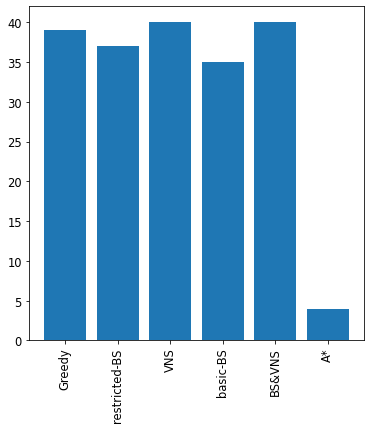

In [47]:
#FEASIBILITY CHECK:

# real benchmark set

import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

#  ======================= REAL instances (for GCLCS paper) ==================================
pt.figure(figsize =(6, 8) )
pt.gcf().subplots_adjust(bottom=0.30)

pt.bar( [1, 2, 3, 4, 5, 6 ], [39, 37, 40, 35, 40, 4] )
pt.xticks([1, 2, 3, 4, 5, 6 ], [ 'Greedy', "restricted-BS", "VNS", "basic-BS", "BS&VNS", "A*"  ], rotation = -270 )
#pt.show()

pt.savefig("real_feasible.eps")